In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split  # para separar "training data" y "test data" fácil

import matplotlib.pyplot as plt  # para gráficos
import pandas as pd  # para administrar el dataframe

# el archivo viene sin nombre en las columnas
column_names = [
    "sepal_length_cm",
    "sepal_width_cm",
    "petal_length_cm",
    "petal_width_cm",
    "class"
]

df = pd.read_csv("iris_data.csv", header=None, names=column_names) # header=None la primera linea no es los nombres
df = df.sample(frac=1) # por defecto el dataset está ordenado por clase, esto lo vuelve random
# nos interesa pasarle a la red clases diferentes en lugar de muchas de la misma clase seguidas

df.head(5)

Using TensorFlow backend.


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
59,5.2,2.7,3.9,1.4,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [2]:
X = df[df.columns[:-1]]  # todas las columnas menos la última, que es la clase
X.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
59,5.2,2.7,3.9,1.4
50,7.0,3.2,4.7,1.4
144,6.7,3.3,5.7,2.5
2,4.7,3.2,1.3,0.2
54,6.5,2.8,4.6,1.5


In [3]:
y = df["class"]  # los resultados
y.head(5)

59     Iris-versicolor
50     Iris-versicolor
144     Iris-virginica
2          Iris-setosa
54     Iris-versicolor
Name: class, dtype: object

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

/home/ander/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(75, 4)
(75,)
(75, 4)
(75,)


In [6]:
class_values = train_y.unique()
print(class_values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
train_y.head(5)  # strings no nos valen como salida de la red

2          Iris-setosa
85     Iris-versicolor
58     Iris-versicolor
91     Iris-versicolor
124     Iris-virginica
Name: class, dtype: object

In [8]:
train_y = pd.get_dummies(train_y)
train_y.head(5)  # ahora si que nos vale como salida de la red

,Iris-setosa,Iris-versicolor,Iris-virginica
2,1,0,0
85,0,1,0
58,0,1,0
91,0,1,0
124,0,0,1


In [9]:
test_y = pd.get_dummies(test_y)  # hacemos lo mismo para los resultados del test
test_y.head(5)

,Iris-setosa,Iris-versicolor,Iris-virginica
25,1,0,0
23,1,0,0
27,1,0,0
10,1,0,0
22,1,0,0


In [10]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(75, 4)
(75, 3)
(75, 4)
(75, 3)


In [11]:
# ahora que ya tenemos los datos preprocesados podemos crear la red

In [12]:
model = Sequential()
model.add(Dense(16, input_shape=(4,), activation="sigmoid"))
model.add(Dense(3, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
# habrá que repasar loss y optimizer para ver que valores poner

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_X, train_y, epochs=200, validation_data=(test_X, test_y))

Train on 75 samples, validate on 75 samples
Epoch 1/200
75/75 [==============================] - 0s 2ms/step - loss: 1.0870 - acc: 0.4267 - val_loss: 1.1407 - val_acc: 0.2400
Epoch 2/200
75/75 [==============================] - 0s 62us/step - loss: 1.0771 - acc: 0.4267 - val_loss: 1.1330 - val_acc: 0.2400
Epoch 3/200
75/75 [==============================] - 0s 60us/step - loss: 1.0679 - acc: 0.4267 - val_loss: 1.1258 - val_acc: 0.2400
Epoch 4/200
75/75 [==============================] - 0s 58us/step - loss: 1.0608 - acc: 0.4267 - val_loss: 1.1174 - val_acc: 0.2400
Epoch 5/200
75/75 [==============================] - 0s 57us/step - loss: 1.0520 - acc: 0.4267 - val_loss: 1.1116 - val_acc: 0.2400
Epoch 6/200
75/75 [==============================] - 0s 133us/step - loss: 1.0458 - acc: 0.4267 - val_loss: 1.1059 - val_acc: 0.2400
Epoch 7/200
75/75 [==============================] - 0s 61us/step - loss: 1.0390 - acc: 0.4267 - val_loss: 1.0992 - val_acc: 0.2400
Epoch 8/200
75/75 [=============

75/75 [==============================] - 0s 75us/step - loss: 0.5754 - acc: 0.8800 - val_loss: 0.5370 - val_acc: 0.8667
Epoch 124/200
75/75 [==============================] - 0s 91us/step - loss: 0.5729 - acc: 0.8667 - val_loss: 0.5348 - val_acc: 0.8533
Epoch 125/200
75/75 [==============================] - 0s 79us/step - loss: 0.5709 - acc: 0.8667 - val_loss: 0.5330 - val_acc: 0.8400
Epoch 126/200
75/75 [==============================] - 0s 70us/step - loss: 0.5680 - acc: 0.8667 - val_loss: 0.5295 - val_acc: 0.8667
Epoch 127/200
75/75 [==============================] - 0s 67us/step - loss: 0.5659 - acc: 0.8800 - val_loss: 0.5246 - val_acc: 0.9200
Epoch 128/200
75/75 [==============================] - 0s 83us/step - loss: 0.5636 - acc: 0.9067 - val_loss: 0.5210 - val_acc: 0.9333
Epoch 129/200
75/75 [==============================] - 0s 88us/step - loss: 0.5615 - acc: 0.9200 - val_loss: 0.5179 - val_acc: 0.9467
Epoch 130/200
75/75 [==============================] - 0s 79us/step - loss: 

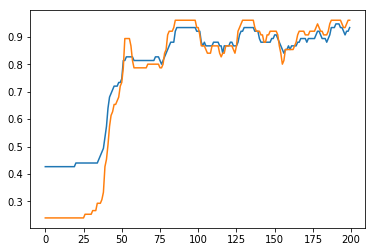

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

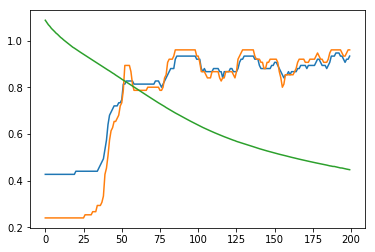

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

In [17]:
score = model.evaluate(test_X, test_y)

75/75 [==============================] - 0s 35us/step


In [18]:
print(score)

[0.40766570846239725, 0.96]
